**CART**  
* Classification and Regression Trees  
* Focus here is on Classification  

* Splits try to minimize informational entropy  
* Splits are called leaves  
* Final splits are called terminal leaves  

**History of Decision Trees**  
* Old Method - becoming less popular - reborn with upgrades  
* Examples: Random Forest ; Gradient Boosting ; etc.  

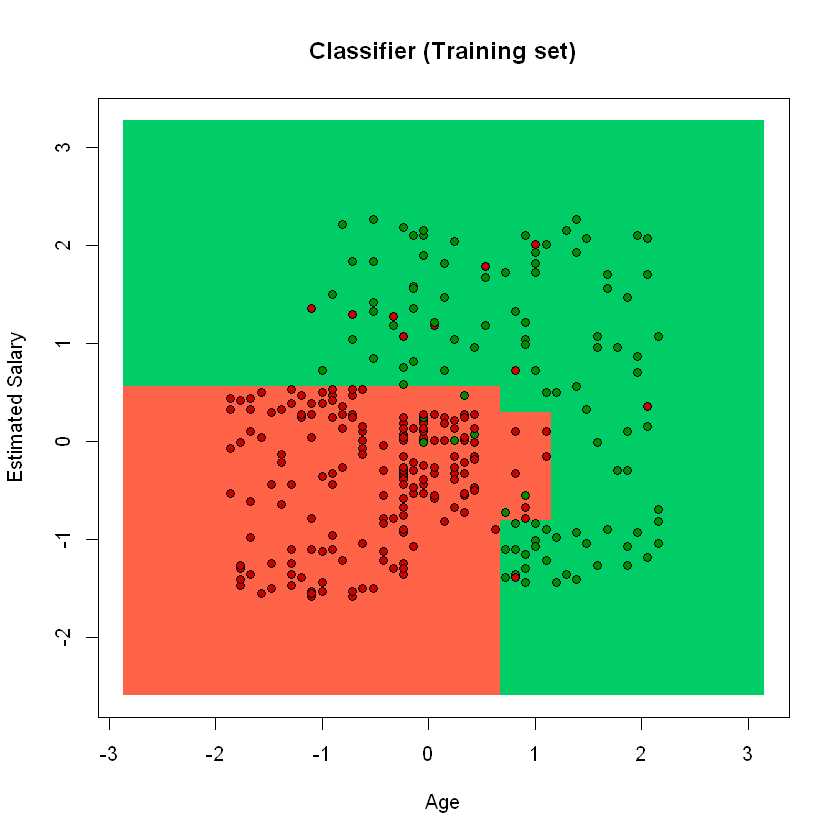

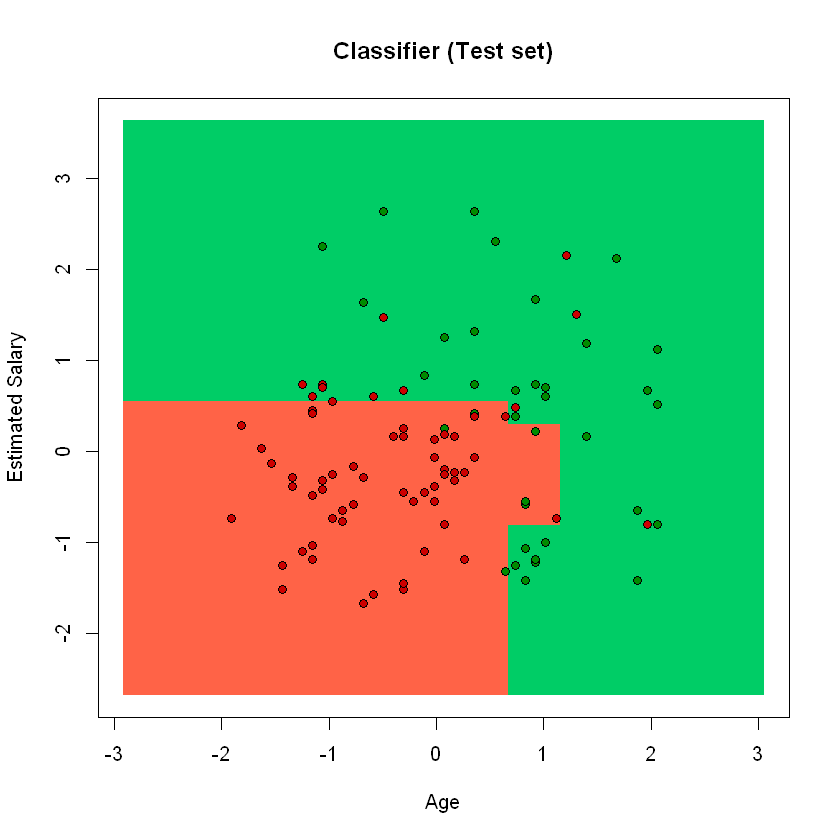

In [3]:
# Classification template

# Importing the dataset
dataset = read.csv('Social_Network_Ads.csv')
dataset = dataset[3:5]

# Encoding the target feature as factor
dataset$Purchased = factor(dataset$Purchased, levels = c(0, 1))

# Splitting the dataset into the Training set and Test set
# install.packages('caTools')
library(caTools)
set.seed(123)
split = sample.split(dataset$Purchased, SplitRatio = 0.75)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)

# Feature Scaling
training_set[-3] = scale(training_set[-3])
test_set[-3] = scale(test_set[-3])

# Fitting classifier to the Training set
library(rpart)
classifier <- rpart(formula = Purchased ~ .,
                   data = training_set)

# Predicting the Test set results
y_pred = predict(classifier, newdata = test_set[-3], type = 'class')

# Making the Confusion Matrix
cm = table(test_set[, 3], y_pred)

# Visualising the Training set results
library(ElemStatLearn)
set = training_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(classifier, newdata = grid_set, type = 'class')
plot(set[, -3],
     main = 'Classifier (Training set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

# Visualising the Test set results
library(ElemStatLearn)
set = test_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(classifier, newdata = grid_set, type = 'class')
plot(set[, -3], main = 'Classifier (Test set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

* For classification - need to add hyperparameter: type = 'class' in a few places in the code.

In [4]:
cm

   y_pred
     0  1
  0 53 11
  1  6 30

**NOW - VISUALIZE THE TREE**  
* In the code above - Age and Salary are standardized.  
* For visualization of the tree - want to look at raw data.  

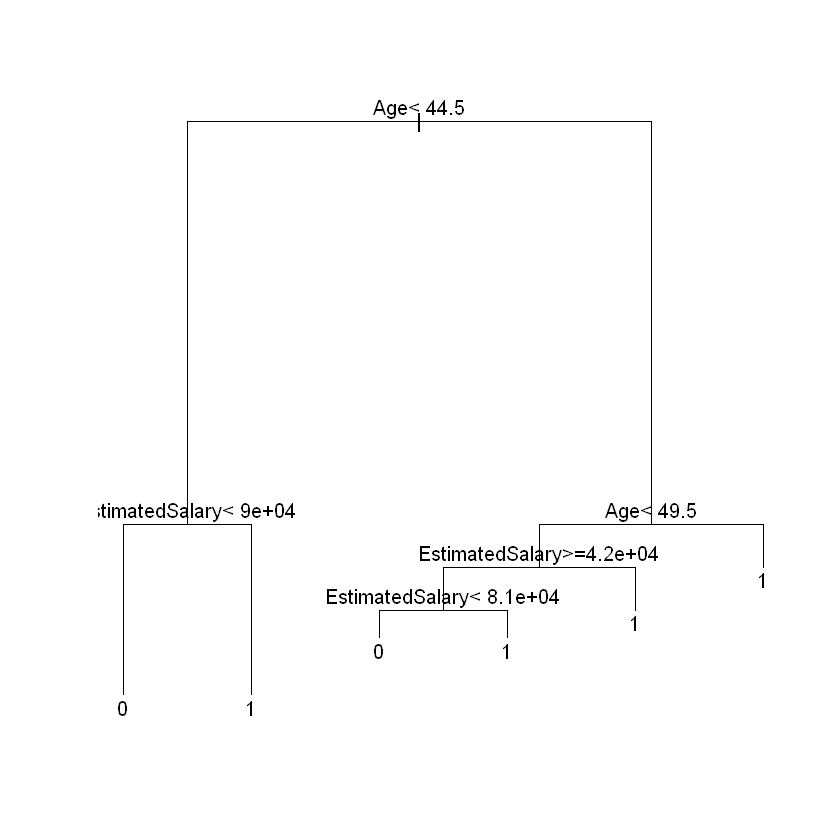

In [6]:
# Classification template

options(scipen = 999)
# Importing the dataset
dataset = read.csv('Social_Network_Ads.csv')
dataset = dataset[3:5]

# Encoding the target feature as factor
dataset$Purchased = factor(dataset$Purchased, levels = c(0, 1))

# Splitting the dataset into the Training set and Test set
# install.packages('caTools')
library(caTools)
set.seed(123)
split = sample.split(dataset$Purchased, SplitRatio = 0.75)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)

# Feature Scaling
#training_set[-3] = scale(training_set[-3])
#test_set[-3] = scale(test_set[-3])

# Fitting classifier to the Training set
library(rpart)
classifier <- rpart(formula = Purchased ~ .,
                   data = training_set)


# Plotting the Decision Tree 
plot(classifier)
text(classifier)